# Week 10 - Exercise

### Problem Statement 

Consider a drying process evolving through two stages of _i_ constant drying rate, and _ii_ falling rate (first order kinetics). 

During stage _i_ the drying rate _per unit area_ is constant, and indicated with $R_c=m\times{f_c}=const$. 

Where: 
- $m$ is a drying rate constant 
- $f_c=w_c-w_e$
- $w_c$ is the critical moisture content
- $w_e$ is the equilibrium moisture content
- $w_0$ is the initial moisture content

During stage _ii_ the rate of drying is proportional to the free moisture content ($f=w-w_e$). The falling rate regime stops at the rquilibrium moisture content $w_e$. 

### Tasks

1. Derive an expression for the time necessary to reduce the moisture content from $w_0$ to $w_c$.
2. Derive an expression for the time necessary to reduce the moisture content from $w_c$ to $w_e$ in the (linear) falling regime.
3. Derive an expression for the time necessary to reduce the moisture content from $w_0$ to $w_e<w<w_c$.
4. If a system, characterised by critical moisture content of 18% and an equilibrium moisture content of 2% takes 7300 seconds to reach a final moisture content of 5% from an initial moisture content of 20%, how long will it take, in the same conditions, to dry a system from 30% to 3%.
5. For the same system produce a plot of the drying time as a function of the kinetic constant m.



### Solution

#### Task 1.

In order to derive an expression for the time necessary to obtain a reduction in the moisture content from an initial value $w_0$ to the critical moisture content $w_c$ we shall start by realising that for $w\geq{w_c}$ the rate of drying (per unit area) $R=const=R_c=m(w_c-w_e)$. 

Hence we can write the rate of reduction in moisture content $\frac{dw}{dt}$ as: 

$$
\frac{dw}{dt}=-R_cA
$$

which can be solved by separating the variables  

$$
-\frac{dw}{R_cA}=dt
$$

and integrating:

$$
-\frac{1}{AR_c}\int_{w_0}^{w_c}dw=\int_{0}^{t_c}dt
$$

leads to:

$$
t_c=\frac{w_0-w_c}{AR_c}=\frac{w_0-w_c}{mA(w_c-w_e)}
$$


#### Task 2. 
In order to derive an expression for the time necessary to obtain a reduction in the moisture content from the critical value  $w_c$ to the equilibrium moisture content let us begin first by deriving an expression for a generic $w_e\geq{w}<w_c$. 
In this case we know that the rate is linearly dependent on $w$ accordig to the expression given in the text $R=m(w-w_e)$. 
The rate of reduction in moisture content $\frac{dw}{dt}$ now becomes: 

$$
\frac{dw}{dt}=-mA(w-w_e)
$$

which can be solved again by separating the variables  

$$
-\frac{1}{mA}\frac{dw}{w-w_e}=dt
$$

and integrating:

$$
-\frac{1}{mA}\int_{w_c}^{w^\prime}\frac{dw}{w-w_e}=\int_0^{t_w}dt
$$

leads to: 

$$
t_w=\frac{1}{mA}\ln\left(\frac{w_c-w_e}{w-w_e}\right)
$$

we note that since ${w-w_e}$ is at the denominator, 

$$
\lim_{w\rightarrow{w_e}}\frac{1}{mA}\ln\left(\frac{w_c-w_e}{w-w_e}\right)=+\infty
$$

so for the moisture content approaching iuts equilibrium value the time necessary diverges.

#### Task 3. 

The total time necessary to dry from an initial moiusture content $w_0>w_c$ to a final moisture content $w<w_c$ is equal to: 

$$
t_{tot}=\frac{1}{mA}\left(\frac{w_0-w_c}{w_c-w_e}+\ln\frac{w_c-w_e}{w-w_e}\right)
$$

#### Task 4. 

Using the expression derived earlier one can compute first 

$$
mA=\frac{1}{t_{tot,1}}\left(\frac{w_{0,1}-w_c}{w_c-w_e}+\ln\frac{w_c-w_e}{w_1-w_e}\right)
$$

and then once $mA$ is known,

$$
t_{tot,2}=\frac{1}{mA}\left(\frac{w_{0,2}-w_c}{w_c-w_e}+\ln\frac{w_c-w_e}{w_2-w_e}\right)
$$

In [1]:
import numpy as np

w_e=0.02
w_c=0.18

w0_1=0.2
w_1=0.05
t_1=7300


mA=(1/t_1)*((w0_1-w_c)/(w_c-w_e)+np.log((w_c-w_e)/(w_1-w_e)))
            
w0_2 = 0.3
w_2 = 0.03
            
t_2=(1/mA)*((w0_2-w_c)/(w_c-w_e)+np.log((w_c-w_e)/(w_2-w_e)))
            
print("\nThe drying time is", f"{t_2:.4}", "[s]") 


The drying time is 1.429e+04 [s]


#### Task 5. 

One cannot plot the dependence of the time on m alone, but the term mA can be used instead. 

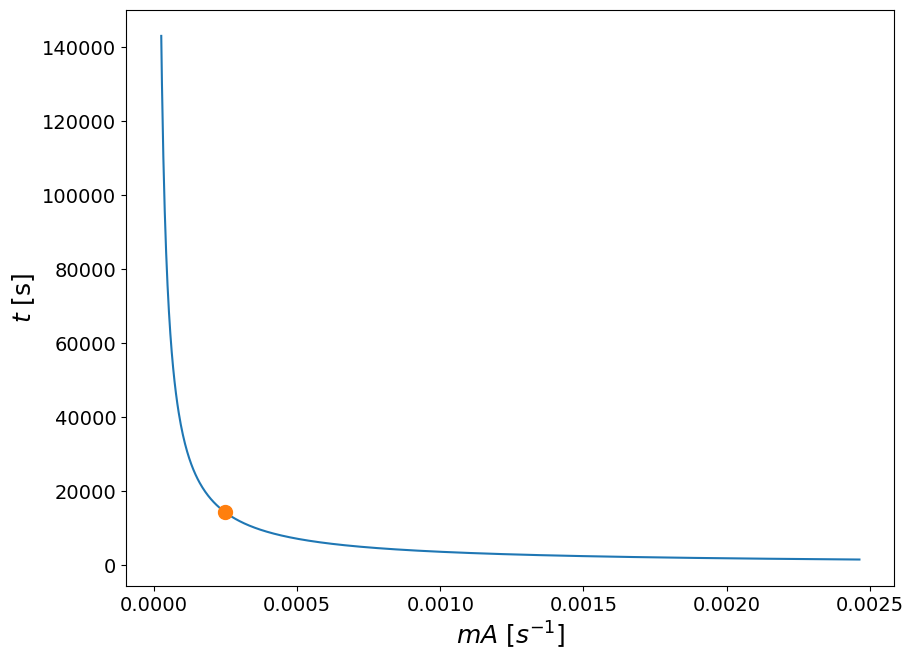

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

# Data
N=1000
mA_v = np.linspace(mA/10,10*mA, N)
t_v=(1/mA_v)*((w0_2-w_c)/(w_c-w_e)+np.log((w_c-w_e)/(w_2-w_e)))

#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(mA_v,t_v, marker=' ') 
axes.plot(mA,t_2,marker='o',markersize=10)
axes.set_xlabel('$mA$ [$s^{-1}$]', fontsize=18);
axes.set_ylabel('$t$ [s]',fontsize=18);



## Additional info

1. Asymptotic behaviour of the time for the moisture content reaching the equilibrium moisture content: 

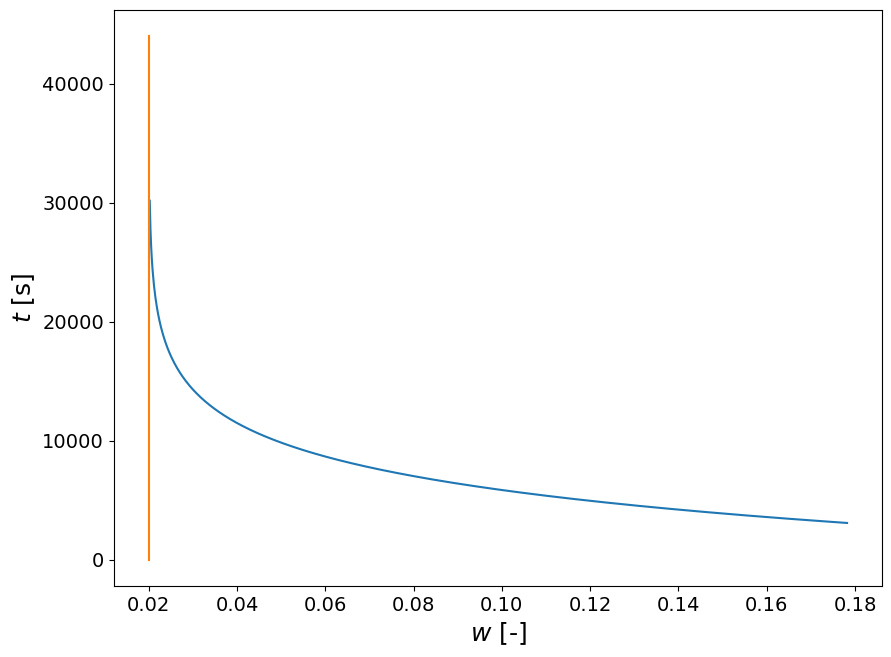

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import cm

# Data
N=1000
ww = np.linspace(w_e*1.01,w_c*0.99, N)
t_div=(1/mA)*((w0_2-w_c)/(w_c-w_e)+np.log((w_c-w_e)/(ww-w_e)))


#Plotting
figure=plt.figure()
axes = figure.add_axes([0.1,0.1,1.2,1.2])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.plot(ww,t_div, marker=' ')
axes.plot(np.array([w_e, w_e]),np.array([0, 44000]))
axes.set_xlabel('$w$ [-]', fontsize=18);
axes.set_ylabel('$t$ [s]',fontsize=18);

## Contributions
Nikita Gusev, 29 March 2021 